# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Ketan\Downloads\Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Data Preprocessing

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [9]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

<AxesSubplot:>

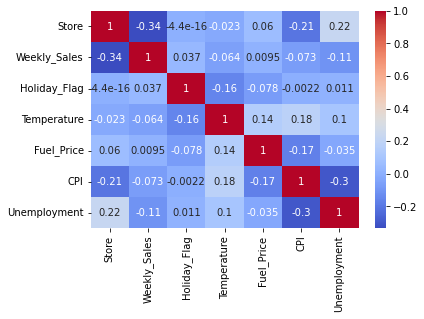

In [10]:
sns.heatmap(df.corr(),cmap = 'coolwarm', annot = True)

# Performing EDA to draw insights 

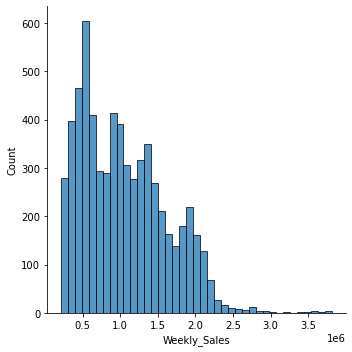

In [11]:
sns.displot(df['Weekly_Sales'])

<AxesSubplot:title={'center':'Top 5 Stores'}, xlabel='Store'>

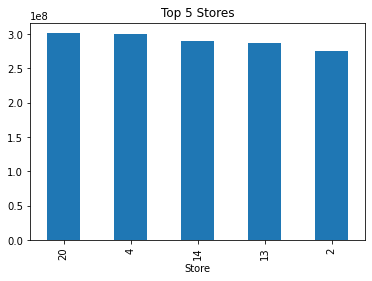

In [12]:
gp = df.groupby(['Store'])
gpv = gp['Weekly_Sales'].sum().sort_values(ascending = False).head(5)
gpv.plot(kind = 'bar',title = 'Top 5 Stores')

<AxesSubplot:title={'center':'Last 5 Stores'}, xlabel='Store'>

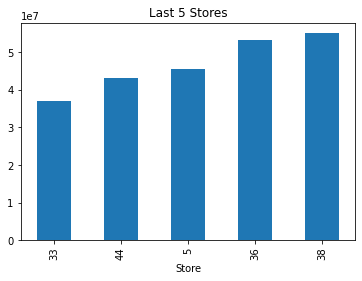

In [13]:
gp = df.groupby(['Store'])
gpv = gp['Weekly_Sales'].sum().sort_values().head(5)
gpv.plot(kind = 'bar',title = 'Last 5 Stores')

# Separating Weekday, Month, Year from Date for further analysis

In [14]:
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [15]:
df['Weekday'] = df.Date.dt.weekday
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df.drop('Date', axis = 1, inplace = True)
df.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,4,12,2010
6,1,1472515.79,0,54.58,2.720,211.215635,8.106,4,3,2010
7,1,1404429.92,0,51.45,2.732,211.018042,8.106,4,3,2010
8,1,1594968.28,0,62.27,2.719,210.820450,7.808,3,2,2010
9,1,1545418.53,0,65.86,2.770,210.622857,7.808,5,9,2010


In [16]:
# Converting Categorical data into Numerical data

In [17]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Weekday', 'Month', 'Year'],
      dtype='object')

In [18]:
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

In [19]:
categorical_col = df[['Store', 'Holiday_Flag', 'Weekday', 'Month', 'Year']]

In [20]:
dummies=pd.get_dummies(df[['Store', 'Holiday_Flag', 'Weekday', 'Month', 'Year']], 
                       columns=['Store', 'Holiday_Flag', 'Weekday', 'Month', 'Year'], 
                       prefix=['Store', 'Holiday_Flag', 'Weekday', 'Month', 'Year'], drop_first=True)

In [21]:
X = pd.concat([X, dummies], axis=1)
X.drop(categorical_col, axis = 1, inplace=True)
X.head(10)

,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2011,Year_2012
0,42.31,2.572,211.096358,8.106,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,39.93,2.514,211.289143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,57.79,2.667,211.380643,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,54.58,2.720,211.215635,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,51.45,2.732,211.018042,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,62.27,2.719,210.820450,7.808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,65.86,2.770,210.622857,7.808,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
X.shape

(6435, 68)

In [23]:
y.shape

(6435,)

# Implementing a Linear Regression Model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
lr.intercept_

-734286.8334059104

In [30]:
lr.coef_

array([-5.48633658e+02,  3.60141091e+03,  1.23137821e+04, -4.61311347e+04,
        3.81192187e+05, -1.21160901e+06,  1.55744162e+06, -1.30193760e+06,
       -2.40541416e+04, -6.73361074e+05, -7.55109128e+05, -1.12755141e+06,
        1.46652243e+06, -2.61325627e+05,  7.92660630e+05,  1.49865764e+06,
        8.67138704e+05,  7.85612784e+04, -8.18398763e+05,  3.48857520e+05,
        5.92557181e+05,  8.88881440e+05,  6.20790098e+05, -7.91031729e+05,
        4.43877077e+05,  6.99281034e+05,  8.35708912e+05, -7.86804745e+05,
        4.49705306e+05,  1.18250698e+06,  1.09428377e+06,  8.65451658e+04,
       -1.10794555e+06, -1.53511681e+05, -8.80963526e+04, -1.72963132e+05,
        6.01439959e+05,  3.63237790e+05, -1.14539973e+06, -9.96659635e+05,
        1.67734713e+05, -9.25058791e+04,  2.68470742e+05, -3.44318764e+04,
        1.16519642e+05, -7.00776491e+05, -2.14981520e+05, -3.44027338e+05,
        5.62653457e+03,  1.89395539e+04, -7.66661302e+04, -4.51788120e+04,
       -3.25634182e+04, -

In [31]:
X_train.columns

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2',
       'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
       'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20',
       'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32',
       'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38',
       'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44',
       'Store_45', 'Holiday_Flag_1', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Weekday_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2011', 'Year_2012'],
      dtype='object')

In [32]:
cdf = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns = ['Coefficient'] )

In [33]:
cdf

,Coefficient
Temperature,-548.633658
Fuel_Price,3601.410908
CPI,12313.782053
Unemployment,-46131.134673
Store_2,381192.187078
...,...
Month_10,61514.649388
Month_11,163973.527950
Month_12,243840.036696
Year_2011,-59389.409117


# Making Predictions after traning the model

In [34]:
predictions = lr.predict(X_test)

In [35]:
predictions

array([ 262557.55476306, 1322714.4939496 ,  977392.67396753, ...,
       1491294.66737133,  575581.11140942,  514965.13409859])

In [36]:
y_test

6159     280048.74
3891    1523410.71
5594    1052429.03
3602    1011938.29
4660     262407.57
           ...    
5440    1301590.13
3582     893613.00
5860    1409544.97
4061     493430.45
2270     570162.28
Name: Weekly_Sales, Length: 1931, dtype: float64

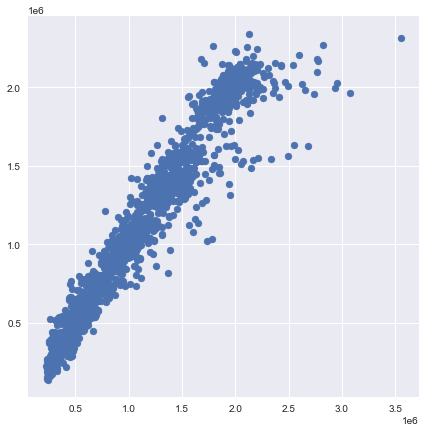

In [37]:
plt.style.use('seaborn')
plt.figure(figsize=(7,7))
plt.scatter(y_test, predictions)

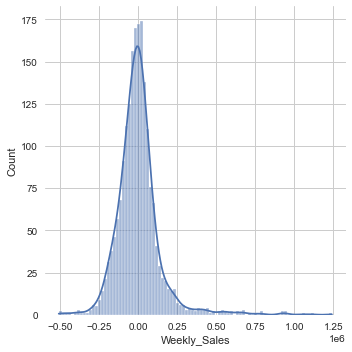

In [38]:
sns.set_style("whitegrid")
sns.displot((y_test - predictions), kde = True)

In [46]:
from sklearn import metrics
import math

In [51]:
metrics.mean_absolute_error(y_test, predictions)

90982.4942438708

In [48]:
metrics.mean_squared_error(y_test, predictions)

20633039287.94742

In [49]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
rmse

143642.05264457696

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions) 

0.935795136392337